In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa as lr
import os
from glob import glob

In [2]:
src = "C:\\Users\\devas\\Desktop\\music\\sample"
audio = glob(src + '/*.mp3')

In [3]:
song1, sfreq = lr.load(audio[0])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal


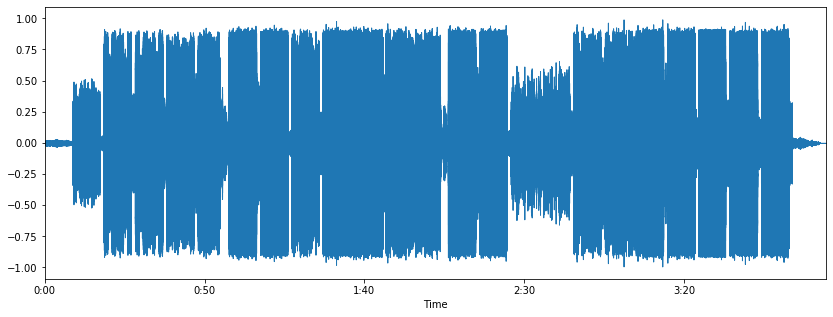

In [8]:
plt.figure(figsize=(14, 5))
lr.display.waveplot(song1, sr=sfreq)

In [62]:
y_8k = librosa.resample(song1, sfreq, 30000)

In [63]:
y_8k.shape

(7333094,)

In [64]:
sfreq

22050

In [65]:
song1.shape

(5389824,)

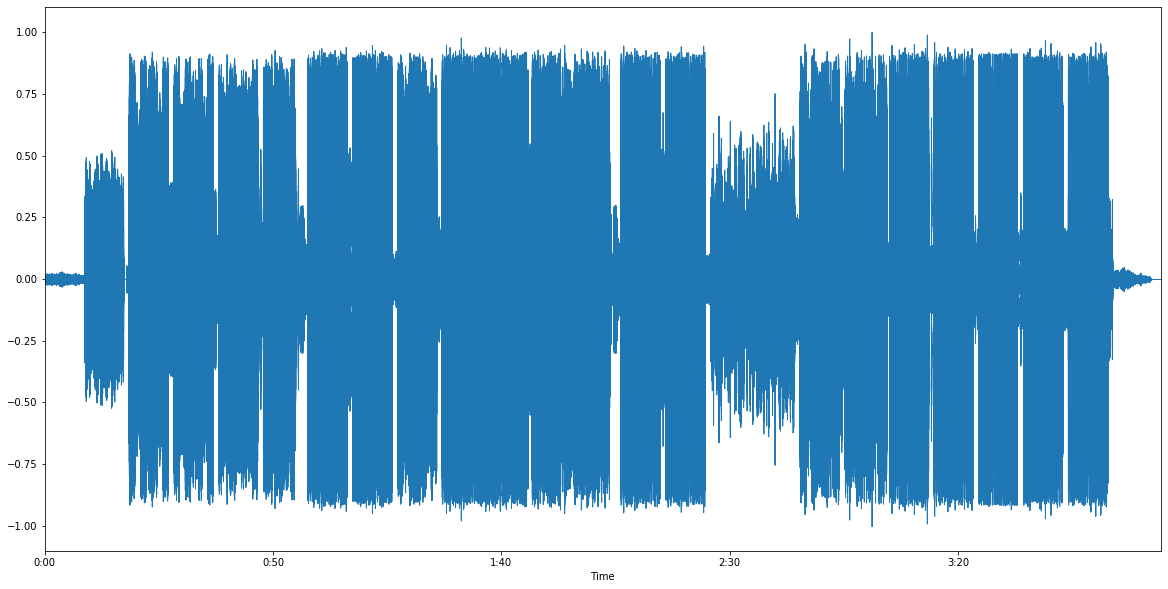

In [67]:
plt.figure(figsize=(20, 10))
lr.display.waveplot(y_8k, sr=30000)

In [69]:
librosa.output.write_wav('file_trim_5s.wav', y_8k, 30000)

In [27]:
librosa.output.write_wav('sd.wav', song1, sfreq)

In [19]:
t = np.random.randint(2,size = (len(song1),17))

In [21]:
t.shape

(5389824, 17)

In [22]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=17)
omp.fit(t, song1)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=17,
                          normalize=True, precompute='auto', tol=None)

In [23]:
coef = omp.coef_
idx_r, = coef.nonzero()

In [33]:
coef

array([-2.32500659e-04,  6.97232194e-05,  4.19164099e-04,  6.36127022e-05,
        6.39047804e-05, -2.47325650e-04,  3.36465903e-04,  1.07423167e-04,
        1.26090369e-04, -3.12092113e-04,  1.29681825e-04, -3.75810160e-04,
        2.23727739e-05,  2.85571249e-04,  2.23691224e-04,  3.40311470e-04,
       -9.03806141e-05])

In [34]:
t

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0]])

In [35]:
idx_r

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

S:\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

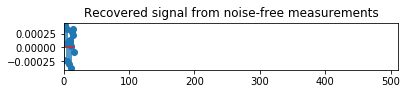

In [36]:
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])